# Zomato Dataset EDA

## 1. Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')
pd.options.display.max_columns = None

## 2. Loading and Inspecting Data

In [2]:
df = pd.read_csv('enhanced_zomato_dataset_clean.csv')
df.head()

,Restaurant_Name,Dining_Rating,Delivery_Rating,Dining_Votes,Delivery_Votes,Cuisine,Place_Name,City,Item_Name,Best_Seller,Votes,Prices,Average_Rating,Total_Votes,Price_per_Vote,Log_Price,Is_Bestseller,Restaurant_Popularity,Avg_Rating_Restaurant,Avg_Price_Restaurant,Avg_Rating_Cuisine,Avg_Price_Cuisine,Avg_Rating_City,Avg_Price_City,Is_Highly_Rated,Is_Expensive
0,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Platter Kebab Combo,BESTSELLER,84,249.0,4.05,39,2.929412,5.521461,1,46,4.05,171.347826,3.81868,255.954894,3.939031,245.130482,1,0
1,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Rumali Shawarma,BESTSELLER,45,129.0,4.05,39,2.804348,4.867534,1,46,4.05,171.347826,3.81868,255.954894,3.939031,245.130482,1,0
2,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Tandoori Salad,NONE,39,189.0,4.05,39,4.725000,5.247024,1,46,4.05,171.347826,3.81868,255.954894,3.939031,245.130482,1,0
3,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken BBQ Salad,BESTSELLER,43,189.0,4.05,39,4.295455,5.247024,1,46,4.05,171.347826,3.81868,255.954894,3.939031,245.130482,1,0
4,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Special Doner Wrap Combo,MUST TRY,31,205.0,4.05,39,6.406250,5.327876,1,46,4.05,171.347826,3.81868,255.954894,3.939031,245.130482,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123657 entries, 0 to 123656
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Restaurant_Name        123657 non-null  object 
 1   Dining_Rating          123657 non-null  float64
 2   Delivery_Rating        123657 non-null  float64
 3   Dining_Votes           123657 non-null  int64  
 4   Delivery_Votes         123657 non-null  int64  
 5   Cuisine                123657 non-null  object 
 6   Place_Name             123657 non-null  object 
 7   City                   123657 non-null  object 
 8   Item_Name              123657 non-null  object 
 9   Best_Seller            123657 non-null  object 
 10  Votes                  123657 non-null  int64  
 11  Prices                 123657 non-null  float64
 12  Average_Rating         123657 non-null  float64
 13  Total_Votes            123657 non-null  int64  
 14  Price_per_Vote         123657 non-nu

## 3. Basic Distribution Analysis

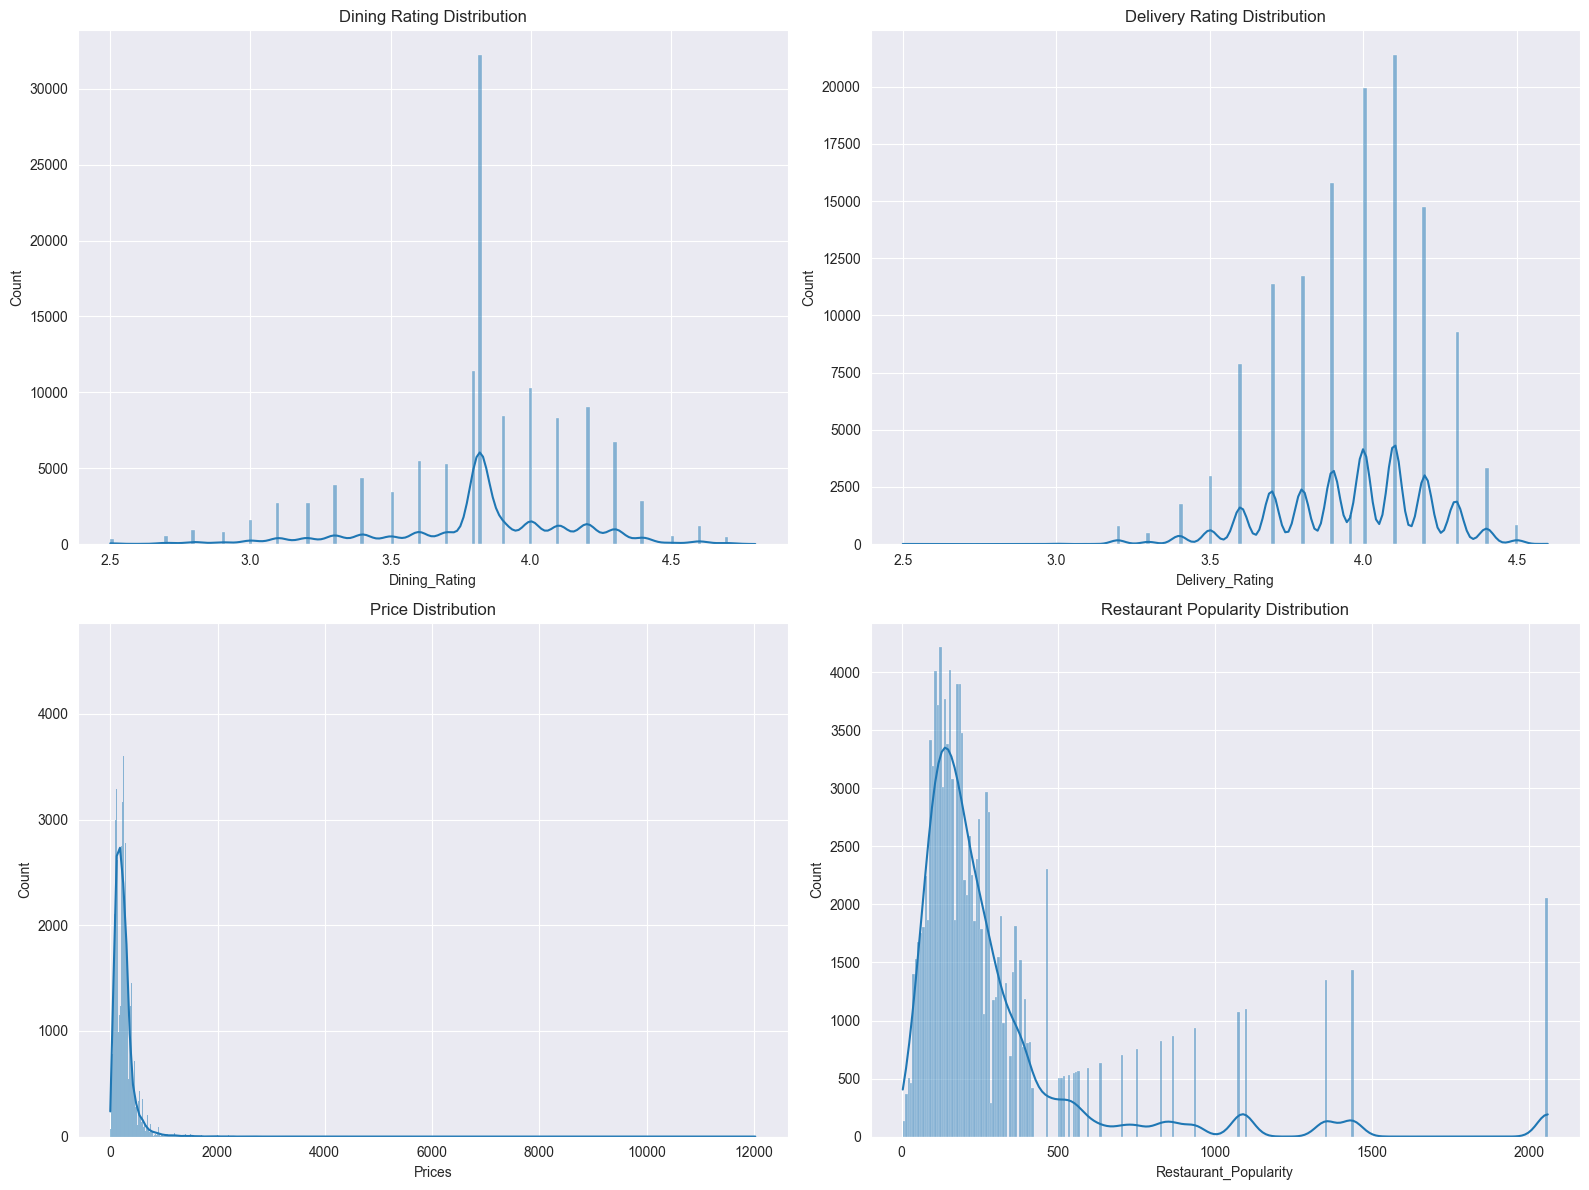

In [4]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
sns.histplot(df['Dining_Rating'].dropna(), kde=True, ax=axes[0, 0]).set_title('Dining Rating Distribution')
sns.histplot(df['Delivery_Rating'].dropna(), kde=True, ax=axes[0, 1]).set_title('Delivery Rating Distribution')
sns.histplot(df['Prices'].dropna(), kde=True, ax=axes[1, 0]).set_title('Price Distribution')
sns.histplot(df['Restaurant_Popularity'].dropna(), kde=True, ax=axes[1, 1]).set_title('Restaurant Popularity Distribution')
plt.tight_layout()

**Insight:** Ratings are skewed left (high ratings are common), while prices and popularity are skewed right (most are low-priced and have low popularity scores).

## 4. Deeper Contextual Analysis

### 4.1 Rating vs. Votes

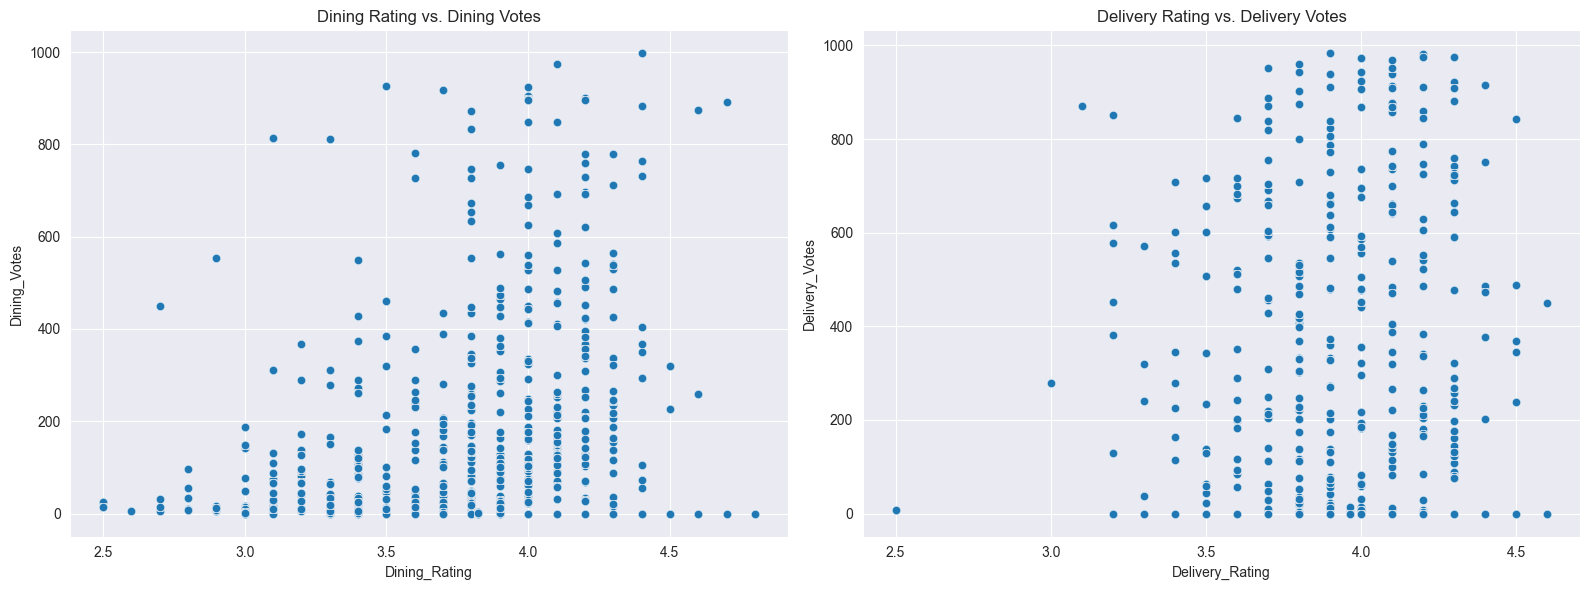

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.scatterplot(x='Dining_Rating', y='Dining_Votes', data=df, ax=axes[0], alpha=0.5)
axes[0].set_title('Dining Rating vs. Dining Votes')
sns.scatterplot(x='Delivery_Rating', y='Delivery_Votes', data=df, ax=axes[1], alpha=0.5)
axes[1].set_title('Delivery Rating vs. Delivery Votes')
plt.tight_layout()

**Insight:** There's a clear trend where higher ratings are associated with a significantly higher number of votes. This suggests that highly-rated restaurants are not just good, but also well-established and frequently reviewed.

### 4.2 Top Cuisines and Their Price/Rating

Text(0.5, 1.0, 'Dining Ratings Across Top 10 Cuisines')

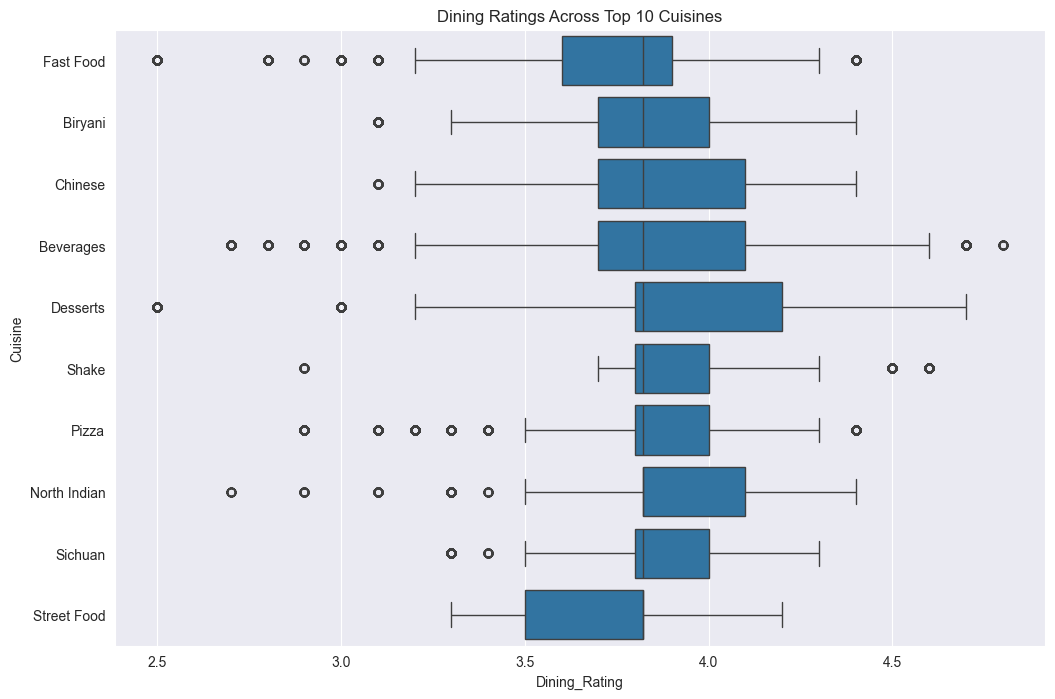

In [6]:
top_cuisines = df['Cuisine'].value_counts().nlargest(10).index
plt.figure(figsize=(12, 8))
sns.boxplot(y='Cuisine', x='Dining_Rating', data=df[df['Cuisine'].isin(top_cuisines)], orient='h')
plt.title('Dining Ratings Across Top 10 Cuisines')

**Insight:** While most popular cuisines have a similar median rating, some (like Continental) show a wider range of ratings, indicating more variability in quality.

### 4.3 Restaurant Performance vs. Cuisine Average

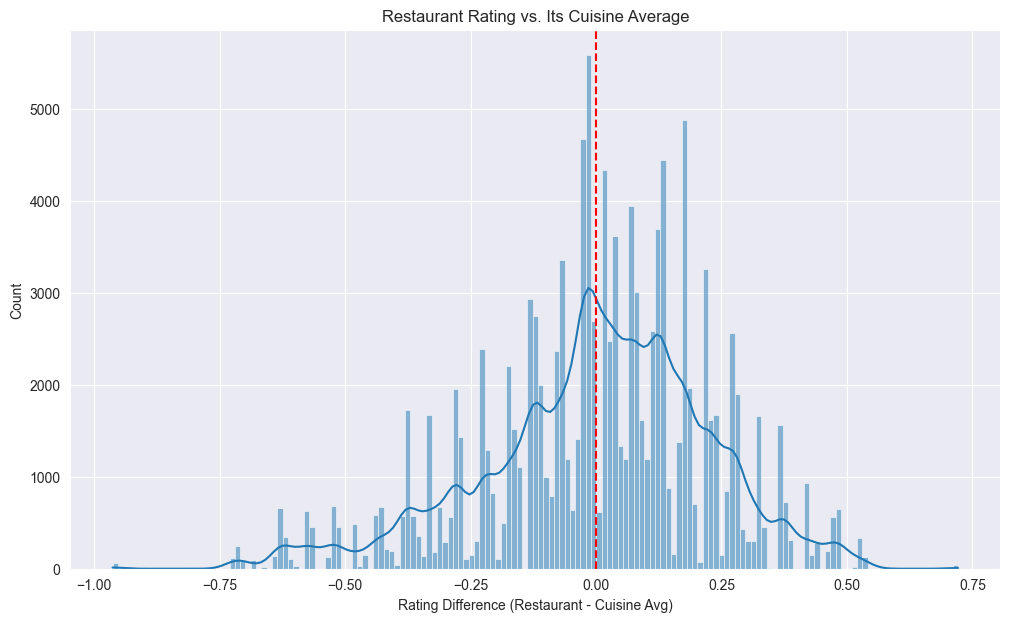

In [7]:
df['Rating_vs_Cuisine_Avg'] = df['Average_Rating'] - df['Avg_Rating_Cuisine']
plt.figure(figsize=(12, 7))
sns.histplot(df['Rating_vs_Cuisine_Avg'], kde=True)
plt.title('Restaurant Rating vs. Its Cuisine Average')
plt.xlabel('Rating Difference (Restaurant - Cuisine Avg)')
plt.axvline(0, color='r', linestyle='--')

**Insight:** The distribution is centered slightly above zero, suggesting that, on average, restaurants tend to be rated slightly higher than the average for their cuisine type. Restaurants to the right of the red line are over-performers.

### 4.4 Price Performance vs. City Average

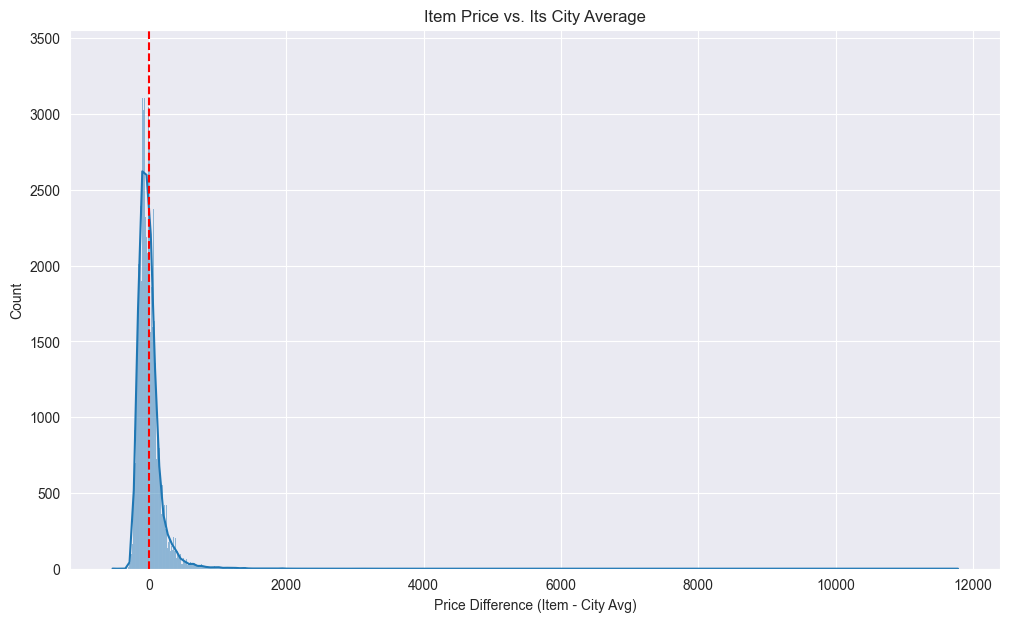

In [8]:
df['Price_vs_City_Avg'] = df['Prices'] - df['Avg_Price_City']
plt.figure(figsize=(12, 7))
sns.histplot(df['Price_vs_City_Avg'], kde=True)
plt.title('Item Price vs. Its City Average')
plt.xlabel('Price Difference (Item - City Avg)')
plt.axvline(0, color='r', linestyle='--')

**Insight:** The distribution is heavily skewed right but the peak is centered near zero. This indicates that while most items are priced close to their city's average, there are many items that are significantly more expensive.

### 4.5 Analysis of 'Expensive' and 'Highly Rated' Flags

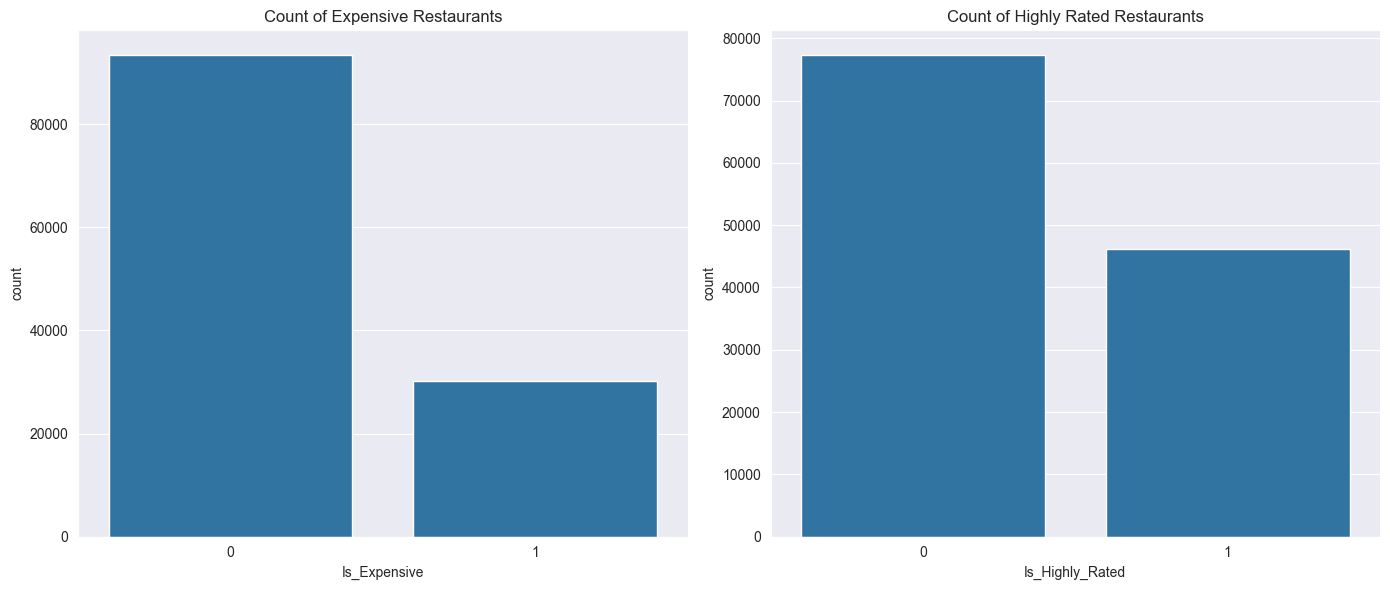

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.countplot(x='Is_Expensive', data=df, ax=axes[0]).set_title('Count of Expensive Restaurants')
sns.countplot(x='Is_Highly_Rated', data=df, ax=axes[1]).set_title('Count of Highly Rated Restaurants')
plt.tight_layout()

Text(0.5, 1.02, 'Expensive vs. Highly Rated')

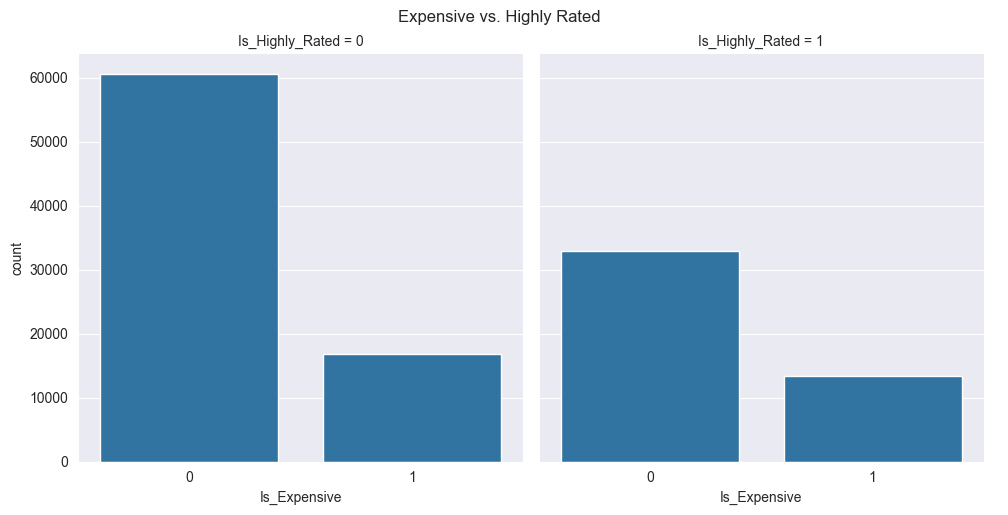

In [10]:
sns.catplot(x='Is_Expensive', col='Is_Highly_Rated', kind='count', data=df)
plt.suptitle('Expensive vs. Highly Rated', y=1.02)

**Insight:** A large portion of restaurants are flagged as 'Highly Rated', while very few are 'Expensive'. Interestingly, a restaurant being expensive doesn't guarantee a high rating, and many highly-rated restaurants are not expensive, offering great value.

## 5. Final Conclusion

This deeper, context-aware EDA provides more nuanced insights:
- **Credible Ratings:** High ratings are strongly correlated with a high number of votes, adding credibility to the rating system.
- **Value is Key:** Many restaurants are rated higher than their cuisine average and are not classified as expensive. Finding these over-performing, value-for-money restaurants is a key outcome of this analysis.
- **Location & Cuisine Matter:** While individual performance varies, the benchmarks for cuisine and city averages provide a powerful tool for contextualizing a restaurant's price and quality.
- **Popularity is Earned:** Restaurant popularity is not easily achieved and is correlated with high ratings, suggesting it's a metric driven by customer satisfaction.